<a href="https://colab.research.google.com/github/UBDBD/Machine-Learning_Project/blob/main/%ED%9A%A8%EC%9C%A8%EC%A0%81%EC%9D%B8_%EC%98%A8%EB%8F%84_%EA%B4%80%EB%A6%AC%EB%A5%BC_%EC%9C%84%ED%95%9C_%EA%B3%BC%EC%97%B4_%EC%A7%80%EC%A0%90_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 데이터 불러오기
path = '/content/drive/MyDrive/임베디드AI해커톤/Project/Data/temperature_data.xlsx'
df = pd.read_excel(path)

df = df.sort_values(by=['loc_idx'])

In [ ]:
df.head()

,a,b,c,d,loc_idx
2072,29.326172,28.037109,26.425781,25.781250,1
1932,35.771484,30.937500,28.037109,27.392578,1
1933,35.771484,30.615234,28.037109,27.070312,1
1934,35.771484,30.937500,28.037109,27.070312,1
1935,35.771484,30.615234,28.037109,27.070312,1


# 데이터 분석

## 평행 좌표

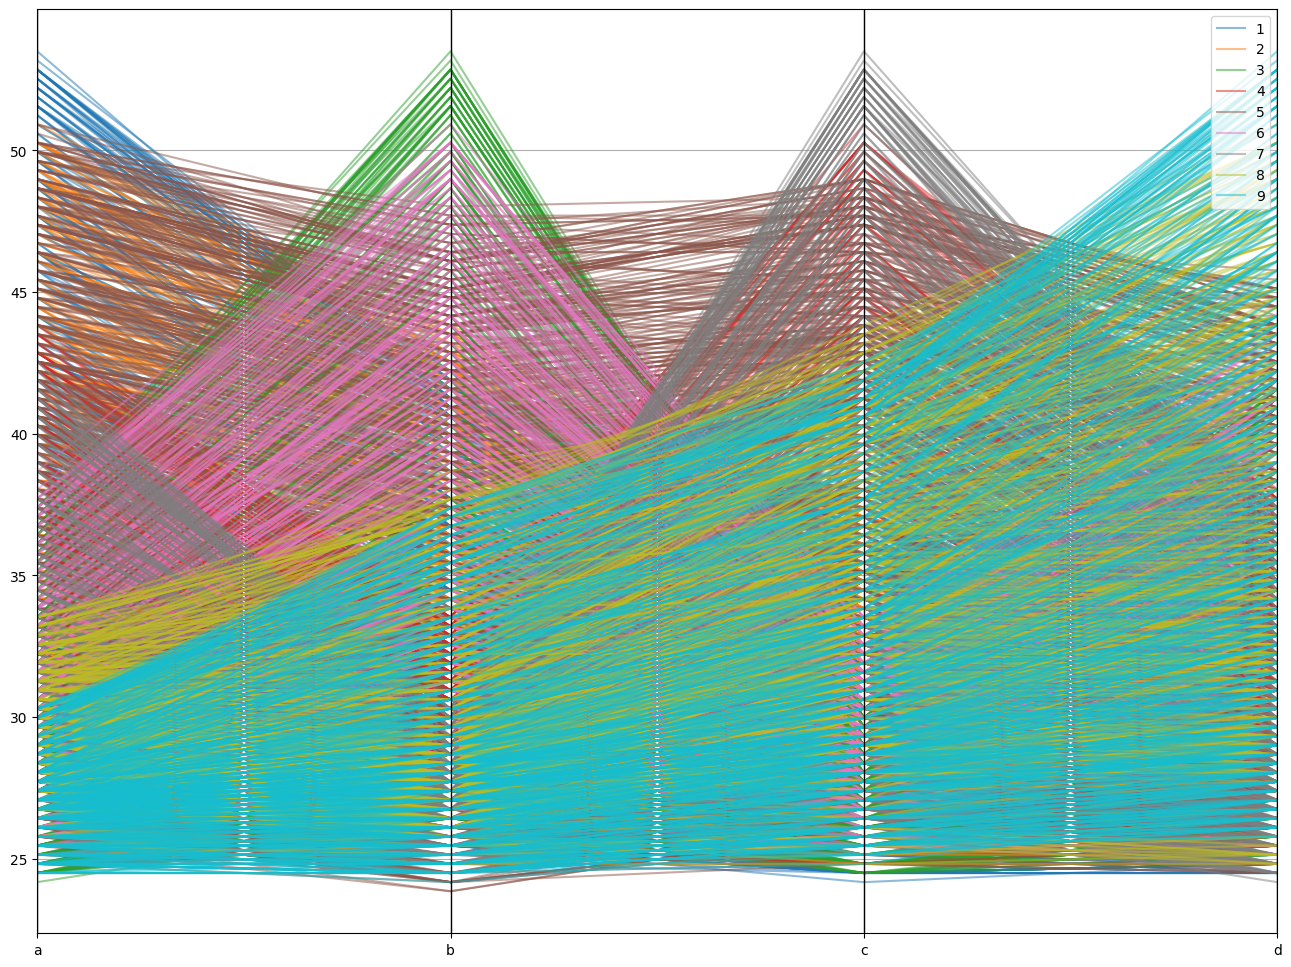

In [ ]:
plt.figure(figsize=(16,12))
parallel_coordinates(df, 'loc_idx', colormap='tab10', alpha=0.5)
plt.show()

## PCA

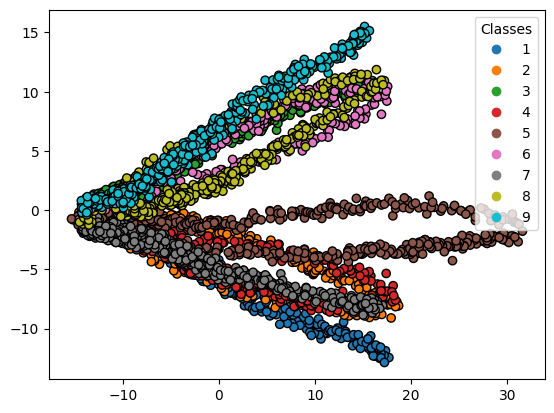

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.iloc[:,:4])

plt.figure()
scatter = plt.scatter(X_pca[:, 0], X_pca[:, -1], c=df['loc_idx'], cmap='tab10', edgecolors='k')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

## t-SNE

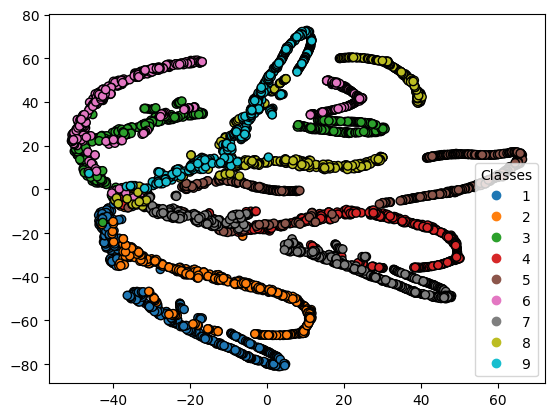

In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(df.iloc[:,:4])

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['loc_idx'], cmap='tab10', edgecolors='k', marker='o')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

## 히트맵

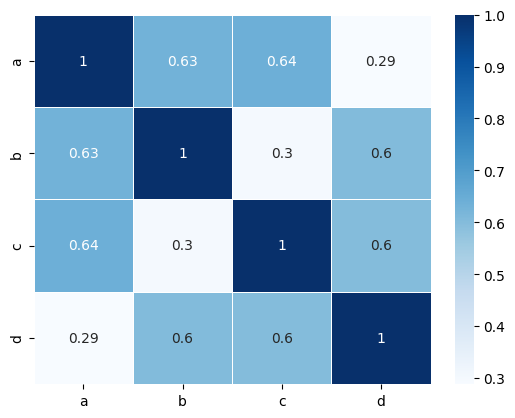

In [ ]:
plt.figure()
sns.heatmap(df.iloc[:,:4].corr(), annot=True, cmap='Blues', linewidths=0.5)
plt.show()

## 페어 플롯

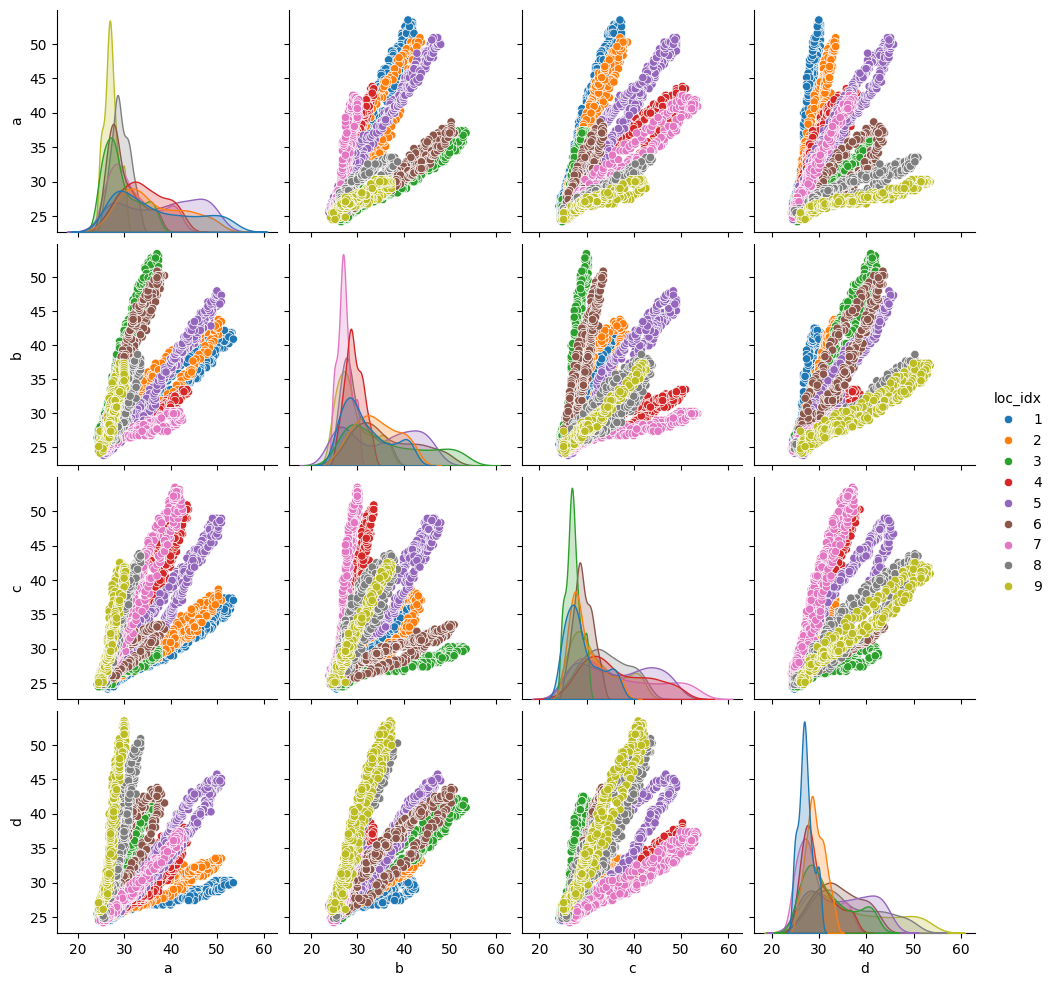

In [ ]:
sns.pairplot(df, hue='loc_idx', palette='tab10')
plt.show()

#모델 비교

In [ ]:
# 데이터 셋 분리
train, test = train_test_split(df, test_size = 0.2, random_state = 42)

X_train = train.iloc[:, 0:4]
X_test = test.iloc[:, 0:4]

y_train = train.iloc[:,-1:]
y_test = test.iloc[:,-1:]

In [ ]:
X_train.head()

,a,b,c,d
2726,29.970703,36.093750,41.894531,52.207031
1877,41.894531,33.515625,30.615234,28.037109
340,25.458984,25.136719,24.814453,25.458984
1095,28.681641,27.714844,33.515625,32.548828
6,49.951172,42.539062,37.060547,33.193359


In [ ]:
y_train.head()

,loc_idx
2726,9
1877,1
340,2
1095,8
6,2


## 로지스틱 회귀

In [ ]:
# 하이퍼 파라미터 튜닝
"""
lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

lr_model = LogisticRegression()

lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

lr_grid_search.fit(X_train, y_train)

print("로지스틱 회귀 최적 하이퍼파라미터:", lr_grid_search.best_params_)
print("로지스틱 회귀 최고 성능:", lr_grid_search.best_score_)
"""

'\nlr_param_grid = {\n    \'penalty\': [\'l1\', \'l2\', \'elasticnet\', \'none\'],\n    \'C\': [0.01, 0.1, 1, 10, 100],\n    \'solver\': [\'lbfgs\', \'liblinear\', \'saga\'],\n    \'max_iter\': [100, 200, 300]\n}\n\nlr_model = LogisticRegression()\n\nlr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring=\'accuracy\', n_jobs=-1)\n\nlr_grid_search.fit(X_train, y_train)\n\nprint("로지스틱 회귀 최적 하이퍼파라미터:", lr_grid_search.best_params_)\nprint("로지스틱 회귀 최고 성능:", lr_grid_search.best_score_)\n'

In [ ]:
# 성능 평가
lr_model = LogisticRegression(C=100, max_iter=200, penalty='l1', solver='liblinear' )

scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"교차 검증 점수: {scores}")
print(f"평균 교차 검증 점수: {scores.mean()}")
print()

start_time = time.time()
lr_model.fit(X_train, y_train)
lr_training_time = time.time() - start_time

lr_y_pred = lr_model.predict(X_test)

print(classification_report(y_test, lr_y_pred))
print()
print('학습시간:', lr_training_time)

교차 검증 점수: [0.8810241  0.85520362 0.86726998 0.88084465 0.8627451 ]
평균 교차 검증 점수: 0.8694174889603664
              precision    recall  f1-score   support

           1       0.93      0.96      0.95       117
           2       0.91      0.84      0.88        88
           3       0.88      0.98      0.93        95
           4       0.82      0.85      0.84        94
           5       0.90      0.62      0.73        98
           6       0.99      0.87      0.93        95
           7       0.84      0.94      0.89        83
           8       0.78      0.90      0.84        83
           9       0.89      0.99      0.94        76

    accuracy                           0.88       829
   macro avg       0.88      0.88      0.88       829
weighted avg       0.89      0.88      0.88       829


학습시간: 5.7100749015808105


## 랜덤 포레스트


In [ ]:
# 하이퍼 파라미터 튜닝
"""
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier()

rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

rf_grid_search.fit(X_train, y_train)

print("랜덤 포레스트 최적 하이퍼파라미터:", rf_grid_search.best_params_)
print("랜덤 포레스트 최고 성능:", rf_grid_search.best_score_)
"""

'\nrf_param_grid = {\n    \'n_estimators\': [100, 200, 300, 400, 500],\n    \'max_depth\': [None, 10, 20, 30],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\'],\n    \'bootstrap\': [True, False]\n}\n\nrf_model = RandomForestClassifier()\n\nrf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring=\'accuracy\', n_jobs=-1)\n\nrf_grid_search.fit(X_train, y_train)\n\nprint("랜덤 포레스트 최적 하이퍼파라미터:", rf_grid_search.best_params_)\nprint("랜덤 포레스트 최고 성능:", rf_grid_search.best_score_)\n'

In [ ]:
# 성능 평가
rf_model = RandomForestClassifier(max_depth=30, max_features='log2', min_samples_leaf=1, min_samples_split=5, n_estimators=100)

scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"교차 검증 점수: {scores}")
print(f"평균 교차 검증 점수: {scores.mean()}")
print()

start_time = time.time()
rf_model.fit(X_train, y_train)
rf_training_time = time.time() - start_time

rf_y_pred = rf_model.predict(X_test)

print(classification_report(y_test, rf_y_pred))
print()
print('학습시간:', rf_training_time)

교차 검증 점수: [0.94728916 0.94268477 0.94720965 0.93966817 0.95324284]
평균 교차 검증 점수: 0.9460189172981519
              precision    recall  f1-score   support

           1       0.97      0.98      0.97       117
           2       0.93      0.94      0.94        88
           3       0.95      1.00      0.97        95
           4       0.92      0.95      0.93        94
           5       0.96      0.91      0.93        98
           6       0.99      0.92      0.95        95
           7       0.94      0.96      0.95        83
           8       0.97      0.92      0.94        83
           9       0.95      1.00      0.97        76

    accuracy                           0.95       829
   macro avg       0.95      0.95      0.95       829
weighted avg       0.95      0.95      0.95       829


학습시간: 0.44457530975341797


## 서포트 벡터 머신

In [ ]:
# 하이퍼 파라미터 튜닝
"""
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

svm_model = SVC()

svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

svm_grid_search.fit(X_train, y_train)

print("서포트 벡터 머신 최적 하이퍼파라미터:", svm_grid_search.best_params_)
print("서포트 벡터 머신 최고 성능:", svm_grid_search.best_score_)
"""

'\nsvm_param_grid = {\n    \'C\': [0.1, 1, 10, 100],\n    \'gamma\': [\'scale\', \'auto\', 0.001, 0.01, 0.1, 1],\n    \'kernel\': [\'linear\', \'rbf\', \'sigmoid\']\n}\n\nsvm_model = SVC()\n\nsvm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring=\'accuracy\', n_jobs=-1)\n\nsvm_grid_search.fit(X_train, y_train)\n\nprint("서포트 벡터 머신 최적 하이퍼파라미터:", svm_grid_search.best_params_)\nprint("서포트 벡터 머신 최고 성능:", svm_grid_search.best_score_)\n'

In [ ]:
# 성능 평가
svm_model = SVC(C=10, gamma=0.1, kernel='rbf')

scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"교차 검증 점수: {scores}")
print(f"평균 교차 검증 점수: {scores.mean()}")
print()

start_time = time.time()
svm_model.fit(X_train, y_train)
svm_training_time = time.time() - start_time

svm_y_pred = svm_model.predict(X_test)

print(classification_report(y_test, svm_y_pred))
print()
print('학습시간:', svm_training_time)

교차 검증 점수: [0.95331325 0.94720965 0.96078431 0.95022624 0.96078431]
평균 교차 검증 점수: 0.9544635555797851
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       117
           2       0.95      0.95      0.95        88
           3       0.99      0.99      0.99        95
           4       0.95      0.96      0.95        94
           5       0.99      0.91      0.95        98
           6       0.98      0.98      0.98        95
           7       0.93      0.99      0.96        83
           8       0.97      0.93      0.95        83
           9       0.96      1.00      0.98        76

    accuracy                           0.97       829
   macro avg       0.97      0.97      0.97       829
weighted avg       0.97      0.97      0.97       829


학습시간: 0.17984747886657715


## k-최근접 이웃

In [ ]:
# 하이퍼 파라미터 튜닝
"""
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

knn_model = KNeighborsClassifier()

knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

knn_grid_search.fit(X_train, y_train)

print("k-최근접 이웃 최적 하이퍼파라미터:", knn_grid_search.best_params_)
print("k-최근접 이웃 최고 성능:", knn_grid_search.best_score_)
"""

'\nknn_param_grid = {\n    \'n_neighbors\': [3, 5, 7, 9, 11],\n    \'weights\': [\'uniform\', \'distance\'],\n    \'metric\': [\'euclidean\', \'manhattan\', \'minkowski\'],\n    \'p\': [1, 2]\n}\n\nknn_model = KNeighborsClassifier()\n\nknn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, scoring=\'accuracy\', n_jobs=-1)\n\nknn_grid_search.fit(X_train, y_train)\n\nprint("k-최근접 이웃 최적 하이퍼파라미터:", knn_grid_search.best_params_)\nprint("k-최근접 이웃 최고 성능:", knn_grid_search.best_score_)\n'

In [ ]:
# 성능 평가

knn_model = KNeighborsClassifier(metric='manhattan', n_neighbors=3, p=1, weights='uniform')

scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"교차 검증 점수: {scores}")
print(f"평균 교차 검증 점수: {scores.mean()}")
print()

start_time = time.time()
knn_model.fit(X_train, y_train)
knn_training_time = time.time() - start_time

knn_y_pred = knn_model.predict(X_test)

print(classification_report(y_test, svm_y_pred))
print()
print('학습시간:', knn_training_time)


교차 검증 점수: [0.95180723 0.95022624 0.94720965 0.93514329 0.94871795]
평균 교차 검증 점수: 0.9466208726307948
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       117
           2       0.95      0.95      0.95        88
           3       0.99      0.99      0.99        95
           4       0.95      0.96      0.95        94
           5       0.99      0.91      0.95        98
           6       0.98      0.98      0.98        95
           7       0.93      0.99      0.96        83
           8       0.97      0.93      0.95        83
           9       0.96      1.00      0.98        76

    accuracy                           0.97       829
   macro avg       0.97      0.97      0.97       829
weighted avg       0.97      0.97      0.97       829


학습시간: 0.023589134216308594


## 결정 트리

In [ ]:
# 하이퍼 파라미터 튜닝
"""
dt_param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

dt_model = DecisionTreeClassifier()

dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

dt_grid_search.fit(X_train, y_train)

print("결정 트리 최적 하이퍼파라미터:", dt_grid_search.best_params_)
print("결정 트리 최고 성능:", dt_grid_search.best_score_)
"""

'\ndt_param_grid = {\n    \'criterion\': [\'gini\', \'entropy\', \'log_loss\'],\n    \'splitter\': [\'best\', \'random\'],\n    \'max_depth\': [None, 10, 20, 30, 40, 50],\n    \'min_samples_split\': [2, 10, 20],\n    \'min_samples_leaf\': [1, 5, 10],\n    \'max_features\': [None, \'sqrt\', \'log2\']\n}\n\ndt_model = DecisionTreeClassifier()\n\ndt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5, scoring=\'accuracy\', n_jobs=-1)\n\ndt_grid_search.fit(X_train, y_train)\n\nprint("결정 트리 최적 하이퍼파라미터:", dt_grid_search.best_params_)\nprint("결정 트리 최고 성능:", dt_grid_search.best_score_)\n'

In [ ]:
# 성능 평가
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter='best')

scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"교차 검증 점수: {scores}")
print(f"평균 교차 검증 점수: {scores.mean()}")
print()

start_time = time.time()
dt_model.fit(X_train, y_train)
dt_training_time = time.time() - start_time

dt_y_pred = dt_model.predict(X_test)

print(classification_report(y_test, svm_y_pred))
print()
print('학습시간:', dt_training_time)

교차 검증 점수: [0.9126506  0.91704374 0.90950226 0.92156863 0.92609351]
평균 교차 검증 점수: 0.9173717494412037
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       117
           2       0.95      0.95      0.95        88
           3       0.99      0.99      0.99        95
           4       0.95      0.96      0.95        94
           5       0.99      0.91      0.95        98
           6       0.98      0.98      0.98        95
           7       0.93      0.99      0.96        83
           8       0.97      0.93      0.95        83
           9       0.96      1.00      0.98        76

    accuracy                           0.97       829
   macro avg       0.97      0.97      0.97       829
weighted avg       0.97      0.97      0.97       829


학습시간: 0.010582923889160156


# 모델 선정

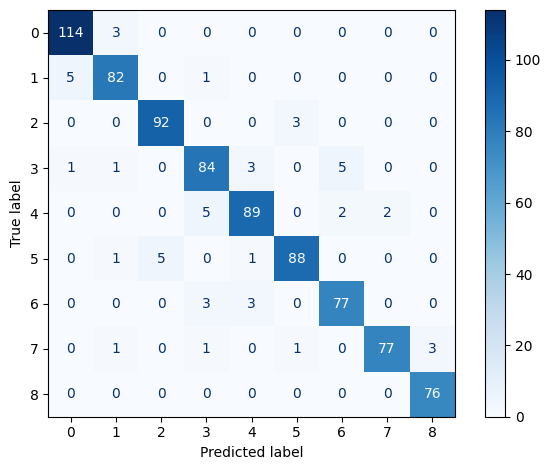

In [ ]:
# 혼동 행렬
cm = confusion_matrix(y_test, knn_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

plt.tight_layout()
plt.show()